In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
otif = pd.read_excel('otif.xlsx')
time_to_ready = pd.read_excel('time_to_ready.xlsx')    

In [3]:
so_client = pd.read_excel('so_client.xlsx')   

In [4]:
otif.head(3)

,so_id,order_number,Поставщик,catalog_id,Дата создания подзаказа,rc,Плановая дата доставки,Дата доставки,be,late,gmv
0,135781,PL0003-3859-01,2482,1877,2025-02-20,КРС ЛогЛаб,2025-03-21,2025-03-24,"АО ""Полюс Логистика""",0,18753.00
1,136123,NNK93141-0006-08,445,1970,2025-02-21,ЛИП,2025-03-07,2025-03-05,NaN,0,110767.25
2,127884,PL48348-2741-03,134,121,2025-02-05,КРС ЛогЛаб,2025-05-23,2025-05-14,NaN,0,526000.00


In [5]:
time_to_ready.head(3)

,min_ready_ts,ready_delta,so_id,system_status,order_number,create_ts,ready_ts,packed_ts,rc_accepted_ts,supplier_id,order_id,distribution_center_id,time_to_ready,time_to_packed,time_to_rc,legal_entity,id,name,rc_name
0,2025-01-20 08:05:10.810,114.318446,118631,READY,PL0530-1124-01,2025-01-18 08:26:30.612,2025-05-14 15:43:44.581,2025-02-06 07:29:54.934,2025-03-20 15:12:41.441,305,60406,150.0,116.303634,-97.342936,42.321372,"АО ""Полюс Алдан""",1,"ПАО ""Полюс""",АЛД ЯТА
1,2025-01-21 12:40:30.058,111.142800,119638,READY,PL48348-2552-05,2025-01-21 04:51:12.195,2025-05-12 16:06:08.021,2025-02-04 15:27:17.787,2025-04-22 17:16:13.314,1242,61049,1488.0,111.468702,-97.026970,77.075643,"АО ""Развитие""",1,"ПАО ""Полюс""",КРС ЛогЛаб
2,2025-01-16 06:44:05.687,109.011617,115847,WAREHOUSE_DELIVERED,PL0003-3336-24,2025-01-14 05:16:14.800,2025-05-05 07:00:49.417,2025-05-05 11:05:40.430,NaT,1,59275,1488.0,111.072623,0.170035,NaN,"АО ""Полюс Логистика""",1,"ПАО ""Полюс""",КРС ЛогЛаб


In [6]:
time_to_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44731 entries, 0 to 44730
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   min_ready_ts            43374 non-null  datetime64[ns]
 1   ready_delta             43374 non-null  float64       
 2   so_id                   44731 non-null  int64         
 3   system_status           44731 non-null  object        
 4   order_number            44731 non-null  object        
 5   create_ts               44731 non-null  datetime64[ns]
 6   ready_ts                43684 non-null  datetime64[ns]
 7   packed_ts               37460 non-null  datetime64[ns]
 8   rc_accepted_ts          31778 non-null  datetime64[ns]
 9   supplier_id             44731 non-null  int64         
 10  order_id                44731 non-null  int64         
 11  distribution_center_id  44582 non-null  float64       
 12  time_to_ready           43684 non-null  float6

In [7]:
otif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44733 entries, 0 to 44732
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   so_id                    44733 non-null  int64         
 1   order_number             44733 non-null  object        
 2   Поставщик                44733 non-null  int64         
 3   catalog_id               44733 non-null  int64         
 4   Дата создания подзаказа  44733 non-null  datetime64[ns]
 5   rc                       44584 non-null  object        
 6   Плановая дата доставки   44120 non-null  datetime64[ns]
 7   Дата доставки            33054 non-null  datetime64[ns]
 8   be                       39095 non-null  object        
 9   late                     44733 non-null  int64         
 10  gmv                      44118 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(4), object(3)
memory usage: 3.8+ MB


In [8]:
df = pd.merge(
    otif[['so_id', 'Поставщик', 'catalog_id', 'gmv', 'late', 'Плановая дата доставки', 'Дата доставки']],
    time_to_ready[['ready_delta', 'create_ts', 'ready_ts', 'legal_entity', 'rc_name', 'time_to_ready', 'so_id']],
    on='so_id',
    how='inner'
)

df = pd.merge(df, so_client, on='so_id', how='left')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43684 entries, 0 to 44728
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   so_id                   43684 non-null  int64         
 1   Поставщик               43684 non-null  int64         
 2   catalog_id              43684 non-null  int64         
 3   gmv                     43683 non-null  float64       
 4   late                    43684 non-null  int32         
 5   Плановая дата доставки  43683 non-null  datetime64[ns]
 6   Дата доставки           33054 non-null  datetime64[ns]
 7   ready_delta             43684 non-null  int64         
 8   create_ts               43684 non-null  datetime64[ns]
 9   ready_ts                43684 non-null  datetime64[ns]
 10  legal_entity            43684 non-null  object        
 11  rc_name                 43536 non-null  object        
 12  time_to_ready           43684 non-null  int32      

In [10]:
# 1. Удалить строки с NaN в колонке 'time_to_ready'
df = df.dropna(subset=['time_to_ready'])

# 2. Привести к числовому типу (float), игнорируя ошибки
df['time_to_ready'] = pd.to_numeric(df['time_to_ready'], errors='coerce')

# 3. Удалить оставшиеся NaN (если появились из-за некорректных значений)
df = df.dropna(subset=['time_to_ready']).copy()

# 4. Округлить вниз и преобразовать в int32
df['time_to_ready'] = df['time_to_ready'].astype(float).apply(lambda x: int(x // 1))

# 5. Преобразовать в int32
df['time_to_ready'] = df['time_to_ready'].astype('int32')

# 6. Преобразование ready_delta в бинарный признак: 0 или 1
df['ready_delta'] = df['ready_delta'].apply(lambda x: 1 if x > 0 else 0)

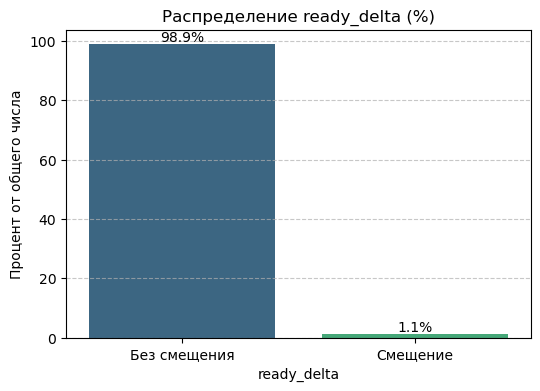

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подсчет долей (в процентах)
value_counts = df['ready_delta'].value_counts(normalize=True).sort_index() * 100
labels = ['Без смещения', 'Смещение']

# Создаем DataFrame для удобства построения графика
plot_df = value_counts.reset_index()
plot_df.columns = ['ready_delta', 'percentage']

plt.figure(figsize=(6, 4))
bar = sns.barplot(data=plot_df, x='ready_delta', y='percentage', order=[0, 1], palette='viridis')

plt.title('Распределение ready_delta (%)')
plt.xlabel('ready_delta')
plt.ylabel('Процент от общего числа')
plt.xticks(ticks=[0, 1], labels=labels)

# Подписываем столбцы значениями в процентах
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
df_corrected = df[df['ready_delta'] == 0]

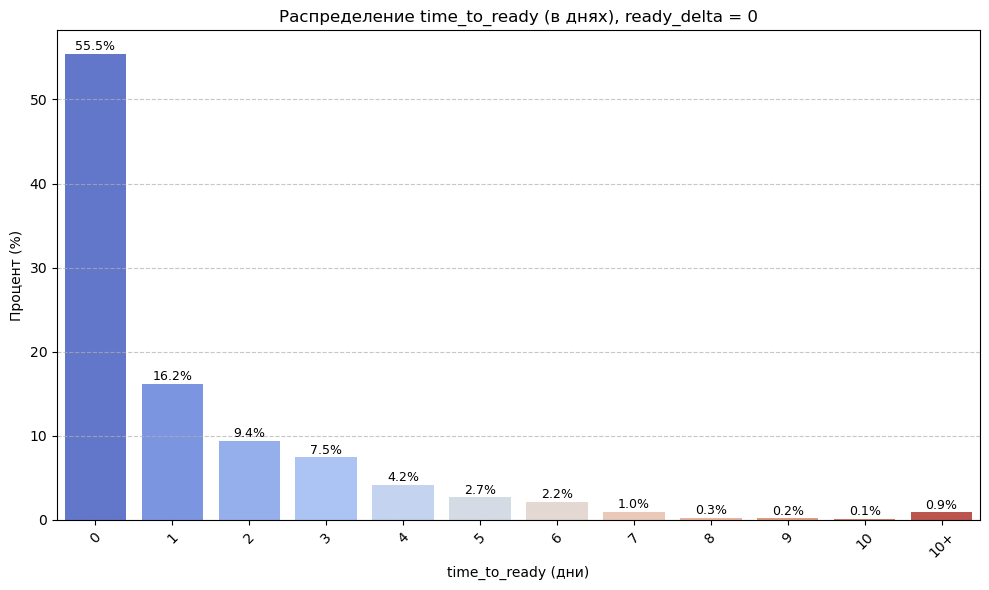

In [13]:
# 1. Создаем копию нужного столбца
ttf = df_corrected['time_to_ready']

# 2. Объединяем всё > 10 в одну группу
ttf_grouped = ttf.apply(lambda x: '10+' if x > 10 else str(int(x)))

# 3. Считаем проценты
value_counts = ttf_grouped.value_counts(normalize=True) * 100

# 4. Строим график
plt.figure(figsize=(10, 6))
bar = sns.barplot(x=value_counts.index, y=value_counts.values, order=[str(i) for i in range(11)] + ['10+'], palette='coolwarm')

plt.title('Распределение time_to_ready (в днях), ready_delta = 0')
plt.xlabel('time_to_ready (дни)')
plt.ylabel('Процент (%)')
plt.xticks(rotation=45)

# Подписываем столбцы в процентах
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=9, color='black', xytext=(0, 5), 
                 textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
print(df['time_to_ready'].describe())

count    43684.000000
mean         1.539259
std          4.123452
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        116.000000
Name: time_to_ready, dtype: float64


In [65]:
df1 = df.copy()

In [91]:
df = df1

In [77]:
df.head()

,so_id,Поставщик,catalog_id,gmv,late,Плановая дата доставки,Дата доставки,ready_delta,create_ts,ready_ts,legal_entity,rc_name,time_to_ready,client_id,ttr_cluster
0,135781,2482,1877,18753.00,0,2025-03-21,2025-03-24,0,2025-02-20 14:27:07.363,2025-02-26 14:18:09.252,"АО ""Полюс Логистика""",КРС ЛогЛаб,5,1,1–9
1,136123,445,1970,110767.25,0,2025-03-07,2025-03-05,1,2025-02-21 10:08:26.043,2025-02-24 13:39:31.628,"АО ""Павловск Неруд""",ЛИП,3,6,1–9
2,127884,134,121,526000.00,0,2025-05-23,2025-05-14,0,2025-02-05 05:02:20.299,2025-02-05 05:29:47.525,"АО ""Развитие""",КРС ЛогЛаб,0,1,0
3,145818,458,302,5551.00,0,2025-04-09,2025-04-02,0,2025-03-12 04:07:09.335,2025-03-12 08:56:50.519,"ООО ""ПРОМГЕОСТРОЙ""",АЛД ЯТА,0,1,0
4,164157,2456,2570,6597.50,0,2025-06-24,NaT,0,2025-04-24 10:56:26.062,2025-04-24 13:01:24.903,АО “Полюс Красноярск”,КРС ЛогЛаб,0,1,0


In [109]:
mask = df['time_to_ready'] > 0

result = (
    df.groupby(['client_id', 'legal_entity'], as_index=False)
      .apply(lambda g: pd.Series({
          'mean_all': round(g['time_to_ready'].mean(), 2),
          'median_all': round(g['time_to_ready'].median(), 2),
          'mean_no_zero': round(g.loc[mask, 'time_to_ready'].mean(), 2) if mask.any() else 0,
          'median_no_zero': round(g.loc[mask, 'time_to_ready'].median(), 2) if mask.any() else 0
      })))
result

,client_id,legal_entity,mean_all,median_all,mean_no_zero,median_no_zero
0,1,"АО ""Полюс Алдан""",1.68,0.0,3.40,2.0
1,1,"АО ""Полюс Вернинское""",1.06,0.0,3.16,2.0
2,1,"АО ""Полюс Логистика""",1.51,0.0,3.56,2.0
3,1,"АО ""Полюс Магадан""",1.67,1.0,2.99,2.0
4,1,"АО ""Развитие""",1.57,0.0,3.28,2.0
5,1,АО “Полюс Красноярск”,1.26,0.0,2.89,2.0
6,1,"ООО ""МФЦ Полюс""",1.00,0.0,3.26,2.0
7,1,"ООО ""ПРОМГЕОСТРОЙ""",1.46,0.0,3.31,2.0
8,1,"ООО ""Полюс Проект""",1.65,0.0,3.67,2.0
9,1,"ООО ""Полюс Сухой Лог""",1.18,0.0,3.02,2.0


In [148]:
result.to_excel('client_be_time_to_ready.xlsx', index=False)

Количество записей в кластерах:
ttr_cluster
0        31002
1–9      11991
20+        363
10–19      328
Name: count, dtype: int64

📊 Доля late == 1 по кластерам:
Кластер time_to_ready  late_%  количество_заказов
                    0    20.7               31002
                  1–9    22.7               11991
                10–19    32.0                 328
                  20+    41.9                 363


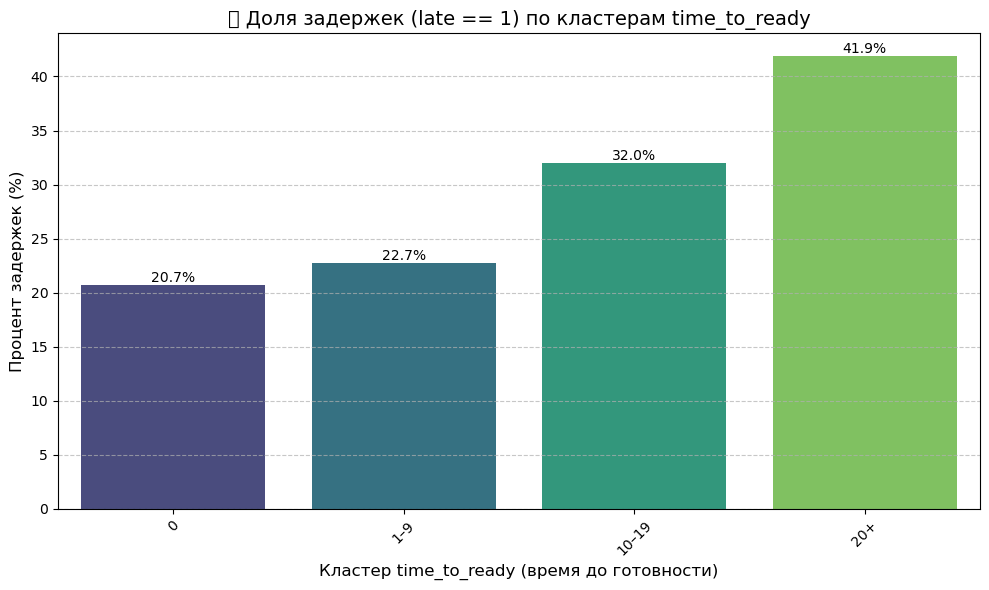

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Убедимся в типах
df['time_to_ready'] = df['time_to_ready'].astype(int)
df['late'] = df['late'].astype(int)

#df = df[df['client_id'] == 1]

# --- ЗАДАЙ ГРАНИЦЫ ВРУЧНУЮ ---
custom_bins = [0, 1, 10, 20, df['time_to_ready'].max() + 1]  # ← Динамически закрываем последний бин

# Формируем метки
labels = []

for i in range(1, len(custom_bins)):
    start = custom_bins[i - 1]
    end = custom_bins[i]

    if start == 0:
        labels.append('0')
    else:
        labels.append(f'{start}–{end - 1}')

labels[-1] = f'{custom_bins[-2]}+'  # Последний кластер — всё, что больше

# Создаем кластеры
df['ttr_cluster'] = pd.cut(df['time_to_ready'], bins=custom_bins, labels=labels, include_lowest=True)

# Проверяем распределение по кластерам
print("Количество записей в кластерах:")
print(df['ttr_cluster'].value_counts(dropna=False))

# Считаем долю late == 1 в каждом кластере
cluster_late_rate = (
    df.groupby('ttr_cluster', observed=False)['late']
    .agg(['mean', 'count'])
    .reset_index()
)
cluster_late_rate['late_rate_percent'] = (cluster_late_rate['mean'] * 100).round(1)

# --- КОРЕКТНАЯ СОРТИРОВКА: задаём нужный порядок ---
order = ['0', '1–9', '10–19', '20+']
cluster_late_rate['ttr_cluster'] = pd.Categorical(cluster_late_rate['ttr_cluster'], categories=order, ordered=True)
cluster_late_rate = cluster_late_rate.sort_values('ttr_cluster')

# Переименовываем столбцы для лучшей читаемости
cluster_late_rate.columns = ['Кластер time_to_ready', 'доля_late', 'количество_заказов', 'late_%']

# Вывод таблицы
print("\n📊 Доля late == 1 по кластерам:")
print(cluster_late_rate[['Кластер time_to_ready', 'late_%', 'количество_заказов']].to_string(index=False))

# Строим график
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=cluster_late_rate,
    x='Кластер time_to_ready',
    y='late_%',
    palette='viridis'
)

plt.title('📈 Доля задержек (late == 1) по кластерам time_to_ready', fontsize=14)
plt.xlabel('Кластер time_to_ready (время до готовности)', fontsize=12)
plt.ylabel('Процент задержек (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписываем столбцы
for p in bar.patches:
    bar.annotate(f"{p.get_height():.1f}%",
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## ГИПОТЕЗА: при увеличении time_to_ready, увеличивается доля late_%

In [17]:
import scipy.stats as stats
import numpy as np

# Подготовим данные для теста
# Для каждой группы: [кол-во late=1, кол-во late=0]
groups = cluster_late_rate[['late_%', 'количество_заказов']].values
observed = np.array([
    [(row[0]/100) * row[1], (1 - row[0]/100) * row[1]] for row in groups
]).astype(int)

# Проверяем тренд с помощью chi2_contingency
chi2, p_value, dof, expected = stats.chi2_contingency(observed, correction=True)

print(f"Chi² = {chi2:.2f}, p-value = {p_value:.4f}")

Chi² = 132.48, p-value = 0.0000


#### p-value близка к нулю, отвергаю гипотезу о равенстве. Принимаю гипотезу о зависимости увеличения late_% в зависимости от увеличения time_to_ready

In [19]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

def find_bad_groups(df, group_column):
    """
    Анализирует две группы:
        - time_to_ready <= 1
        - time_to_ready >= 10
    
    Для каждой находит "плохие" группы по указанному столбцу (group_column),
    возвращая подробную информацию: количество заказов, долю late, p-value и флаг.

    Выводит:
        - список плохих РЦ/поставщиков,
        - среднюю долю задержек по всем в группе,
        - всего заказов,
        - % плохих от общего числа.
    """

    def analyze_group(df_slice):
        total_all = len(df_slice)
        if total_all == 0:
            return pd.DataFrame(), 0, 0  # Защита от пустых срезов

        late_all = df_slice['late'].sum()
        results = []

        for group_name, group_data in df_slice.groupby(group_column):
            late_count = group_data['late'].sum()
            total_count = len(group_data)

            if total_count < 20:
                continue

            count = [late_count, late_all - late_count]
            nobs = [total_count, total_all - total_count]

            stat, pval = proportions_ztest(count, nobs)

            results.append({
                group_column: group_name,
                'Количество_заказов': total_count,
                'Доля_late': round(late_count / total_count * 100, 2),
                'p_value': round(pval, 4),
                'significantly_higher': (pval < 0.05) and (late_count / total_count > late_all / total_all)
            })

        results_df = pd.DataFrame(results)
        bad_only = results_df[results_df['significantly_higher']].sort_values(by='Доля_late', ascending=False)
        return bad_only, total_all, late_all

    # --- Группа time_to_ready <= 1 ---
    df_fast = df[df['time_to_ready'] <= 1]
    fast_results, fast_total, fast_late = analyze_group(df_fast)

    fast_overall_late_rate = round(fast_late / fast_total * 100, 2) if fast_total > 0 else 0
    fast_unique_groups = df_fast[group_column].nunique()
    fast_bad_count = len(fast_results)
    fast_bad_ratio = round(fast_bad_count / fast_unique_groups * 100, 2) if fast_unique_groups > 0 else 0

    # --- Группа time_to_ready >= 10 ---
    df_slow = df[df['time_to_ready'] >= 10]
    slow_results, slow_total, slow_late = analyze_group(df_slow)

    slow_overall_late_rate = round(slow_late / slow_total * 100, 2) if slow_total > 0 else 0
    slow_unique_groups = df_slow[group_column].nunique()
    slow_bad_count = len(slow_results)
    slow_bad_ratio = round(slow_bad_count / slow_unique_groups * 100, 2) if slow_unique_groups > 0 else 0

    # --- Вывод результатов ---

    print(f"\n🔴 Плохие {group_column} при time_to_ready <= 1:")
    if not fast_results.empty:
        print(fast_results[[group_column, 'Количество_заказов', 'Доля_late']].to_string(index=False))
    else:
        print("Нет значимо плохих объектов.")

    print(f"\n📈 Статистика (time_to_ready <= 1):")
    print(f"Средняя доля задержек по всем: {fast_overall_late_rate}%")
    print(f"Всего заказов: {fast_total}")
    print(f"Доля плохих {group_column}: {fast_bad_ratio}% ({fast_bad_count} из {fast_unique_groups})")

    print(f"\n\n🔴 Плохие {group_column} при time_to_ready >= 10:")
    if not slow_results.empty:
        print(slow_results[[group_column, 'Количество_заказов', 'Доля_late']].to_string(index=False))
    else:
        print("Нет значимо плохих объектов.")

    print(f"\n📈 Статистика (time_to_ready >= 10):")
    print(f"Средняя доля задержек по всем: {slow_overall_late_rate}%")
    print(f"Всего заказов: {slow_total}")
    print(f"Доля плохих {group_column}: {slow_bad_ratio}% ({slow_bad_count} из {slow_unique_groups})")

In [20]:
find_bad_groups(df, 'rc_name')


🔴 Плохие rc_name при time_to_ready <= 1:
     rc_name  Количество_заказов  Доля_late
     Иркутск                 120      70.00
 Тюмень ГРЗН                  20      70.00
     АЛД ЯТА                1267      31.97
       СПБ-1                 760      29.08
РЦ Хабаровск                 298      26.17
Артем ЛогЛаб                1769      25.38
  КРС ЛогЛаб               12033      25.23
 НЕВССК СТАР                1284      23.44

📈 Статистика (time_to_ready <= 1):
Средняя доля задержек по всем: 20.71%
Всего заказов: 31002
Доля плохих rc_name: 38.1% (8 из 21)


🔴 Плохие rc_name при time_to_ready >= 10:
   rc_name  Количество_заказов  Доля_late
КРС ЛогЛаб                 198      47.98

📈 Статистика (time_to_ready >= 10):
Средняя доля задержек по всем: 36.17%
Всего заказов: 763
Доля плохих rc_name: 5.56% (1 из 18)


In [21]:
find_bad_groups(df, 'client_id')


🔴 Плохие client_id при time_to_ready <= 1:
 client_id  Количество_заказов  Доля_late
       245                  24      62.50
         8                  48      37.50
         1               12071      25.31

📈 Статистика (time_to_ready <= 1):
Средняя доля задержек по всем: 20.71%
Всего заказов: 31002
Доля плохих client_id: 23.08% (3 из 13)


🔴 Плохие client_id при time_to_ready >= 10:
Нет значимо плохих объектов.

📈 Статистика (time_to_ready >= 10):
Средняя доля задержек по всем: 36.17%
Всего заказов: 763
Доля плохих client_id: 0.0% (0 из 10)


In [41]:
find_bad_groups(df, 'catalog_id')


🔴 Плохие catalog_id при time_to_ready <= 1:
 catalog_id  Количество_заказов  Доля_late
       3023                  21     100.00
       1077                 137      86.13
       2744                  29      79.31
        629                  33      75.76
        760                 226      75.66
       2137                 226      71.68
       1037                  29      68.97
       1697                  47      65.96
       1547                  42      64.29
        683                  24      62.50
       1604                  36      61.11
       1078                  72      59.72
        985                  85      56.47
       1081                 376      52.93
       1541                  43      48.84
       1958                  90      47.78
        585                  79      45.57
       2386                  54      44.44
        412                  88      43.18
       2519                  26      42.31
       2183                  29      41.38
        3

In [43]:
find_bad_groups(df, 'rc_name')


🔴 Плохие rc_name при time_to_ready <= 1:
     rc_name  Количество_заказов  Доля_late
     Иркутск                 120      70.00
 Тюмень ГРЗН                  20      70.00
     АЛД ЯТА                1267      31.97
       СПБ-1                 760      29.08
РЦ Хабаровск                 298      26.17
Артем ЛогЛаб                1769      25.38
  КРС ЛогЛаб               12033      25.23
 НЕВССК СТАР                1284      23.44

📈 Статистика (time_to_ready <= 1):
Средняя доля задержек по всем: 20.71%
Всего заказов: 31002
Доля плохих rc_name: 38.1% (8 из 21)


🔴 Плохие rc_name при time_to_ready >= 10:
   rc_name  Количество_заказов  Доля_late
КРС ЛогЛаб                 198      47.98

📈 Статистика (time_to_ready >= 10):
Средняя доля задержек по всем: 36.17%
Всего заказов: 763
Доля плохих rc_name: 5.56% (1 из 18)


In [45]:
find_bad_groups(df, 'client_id')


🔴 Плохие client_id при time_to_ready <= 1:
 client_id  Количество_заказов  Доля_late
       245                  24      62.50
         8                  48      37.50
         1               12071      25.31

📈 Статистика (time_to_ready <= 1):
Средняя доля задержек по всем: 20.71%
Всего заказов: 31002
Доля плохих client_id: 23.08% (3 из 13)


🔴 Плохие client_id при time_to_ready >= 10:
Нет значимо плохих объектов.

📈 Статистика (time_to_ready >= 10):
Средняя доля задержек по всем: 36.17%
Всего заказов: 763
Доля плохих client_id: 0.0% (0 из 10)


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def find_bad_groups_time_to_ready(df, group_column, min_ttr_threshold=1):
    """
    Находит группы (например, Поставщик, rc_name), у которых time_to_ready 
    статистически выше среднего по другим группам.
    
    Параметры:
        df (pd.DataFrame): исходный датафрейм
        group_column (str): столбец для анализа ('Поставщик', 'rc_name' и т.п.)
        min_ttr_threshold (int): минимальное значение time_to_ready для анализа (по умолчанию > 1)
    
    Выводит:
        Красивый print с результатами анализа.
    """
    
    # Исключаем слишком маленькие значения time_to_ready
    df_filtered = df[df['time_to_ready'] > min_ttr_threshold]

    # Общее среднее и медиана time_to_ready (только для значений > min_ttr_threshold)
    overall_mean = df_filtered['time_to_ready'].mean()
    overall_median = df_filtered['time_to_ready'].median()

    results = []

    for group_name, group_data in df_filtered.groupby(group_column):
        n = len(group_data)
        
        if n < 20:
            continue  # Пропускаем малые выборки
        
        group_ttr = group_data['time_to_ready']
        group_mean = group_ttr.mean()
        group_median = group_ttr.median()

        # Сравнение с остальными (тоже без учёта time_to_ready <= min_ttr_threshold)
        others_ttr = df_filtered[df_filtered[group_column] != group_name]['time_to_ready']

        try:
            stat, pval = mannwhitneyu(group_ttr, others_ttr, alternative='greater')
        except ValueError:
            # При одинаковых значениях (например, все нули)
            pval = 1.0

        significantly_higher = pval < 0.05 and group_median > overall_median

        results.append({
            group_column: group_name,
            'Количество_заказов': n,
            'Среднее_time_to_ready': round(group_mean, 2),
            'Медиана_time_to_ready': group_median,
            'p_value': round(pval, 4),
            'significantly_higher': significantly_higher
        })

    # Создаем DataFrame
    results_df = pd.DataFrame(results)

    # Фильтруем только "плохие"
    bad_only = results_df[results_df['significantly_higher']].sort_values(by='Медиана_time_to_ready', ascending=False)

    # Вывод результата
    print(f"\n🔴 Группы '{group_column}' с высоким time_to_ready (> {min_ttr_threshold}):")


    return bad_only

In [57]:
# Для РЦ
find_bad_groups_time_to_ready(df, 'rc_name', min_ttr_threshold=2)


🔴 Группы 'rc_name' с высоким time_to_ready (> 2):


,rc_name,Количество_заказов,Среднее_time_to_ready,Медиана_time_to_ready,p_value,significantly_higher
7,ЛИП,1397,9.21,6.0,0.0,True
12,РЦ Хабаровск,141,5.62,5.0,0.0,True


In [63]:
# Для РЦ
find_bad_groups_time_to_ready(df, 'client_id', min_ttr_threshold=0)


🔴 Группы 'client_id' с высоким time_to_ready (> 0):


,client_id,Количество_заказов,Среднее_time_to_ready,Медиана_time_to_ready,p_value,significantly_higher
9,331,37,5.51,4.0,0.0001,True
8,250,388,3.74,3.0,0.0000,True


In [344]:
# Для поставщиков
find_bad_groups_time_to_ready(df, 'Поставщик', min_ttr_threshold=1)


🔴 Группы 'Поставщик' с высоким time_to_ready (> 1):


,Поставщик,Количество_заказов,Среднее_time_to_ready,Медиана_time_to_ready,p_value,significantly_higher
43,857,505,15.02,11.0,0.0000,True
4,13,21,8.81,6.0,0.0179,True
42,855,125,8.35,6.0,0.0000,True
65,2453,40,4.97,4.5,0.0005,True
5,18,1007,4.83,4.0,0.0000,True
35,567,95,5.54,4.0,0.0065,True
41,835,33,4.61,4.0,0.0010,True


In [346]:
# Для legal_entity
find_bad_groups_time_to_ready(df, 'legal_entity')


🔴 Группы 'legal_entity' с высоким time_to_ready (> 1):


,legal_entity,Количество_заказов,Среднее_time_to_ready,Медиана_time_to_ready,p_value,significantly_higher
19,"ООО ""Анима Инфинита Флекс Новород""",30,6.57,5.0,0.0003,True
15,"АО ""УПиР""",36,5.36,4.0,0.0235,True
16,"АО ""Ургалуголь""",174,4.98,4.0,0.0000,True
20,"ООО ""ЕСК-СУЭК""",192,4.46,4.0,0.0191,True
36,"Общество с ограниченной ответственностью ""Карб...",135,4.33,4.0,0.0000,True
37,"Общество с ограниченной ответственностью ""Разр...",53,5.23,4.0,0.0009,True
38,"Общество с ограниченной ответственностью ""Разр...",23,5.65,4.0,0.0112,True
39,"ПАО ""НЛМК""",1876,7.36,4.0,0.0000,True


## Находим порог значимости time_to_ready

In [127]:
import numpy as np
from scipy.stats import mannwhitneyu

# Создаем список всех возможных порогов для анализа
possible_thresholds = sorted(df['time_to_ready'].unique())

best_threshold = 0
best_pvalue = 1.0
best_delta = 0.0

overall_late_rate = df['late'].mean()

for t in possible_thresholds:
    # Разделяем данные на две группы:
    low_ttr = df[df['time_to_ready'] <= t]['late']
    high_ttr = df[df['time_to_ready'] > t]['late']

    if len(low_ttr) < 20 or len(high_ttr) < 20:
        continue  # Пропускаем малые выборки

    # Доли late в группах
    rate_low = low_ttr.mean()
    rate_high = high_ttr.mean()

    delta = rate_high - rate_low

    # Проверяем статистическую значимость различия
    _, p = mannwhitneyu(low_ttr, high_ttr, alternative='less')

    # Нас интересует момент, когда доля задержек резко возрастает
    if p < 0.05 and delta > 0:
        if p < best_pvalue:
            best_pvalue = p
            best_threshold = t
            best_delta = delta

# Если не найдено — используем эмпирический подход по максимальному относительному скачку
if best_threshold == 0:
    cluster_late_rate_sorted = cluster_late_rate.sort_values('Кластер time_to_ready').copy()

    cluster_late_rate_sorted['delta'] = cluster_late_rate_sorted['late_%'].diff()
    max_jump_idx = cluster_late_rate_sorted['delta'].idxmax()

    if pd.notna(max_jump_idx):
        best_cluster = cluster_late_rate_sorted.iloc[max_jump_idx - 1]['Кластер time_to_ready']
        best_threshold = get_upper_bound(best_cluster)
    else:
        best_threshold = 0
else:
    best_threshold = int(best_threshold)

print(f"\n✅ Автоматически определён допустимый порог time_to_ready: до {best_threshold} дней")


✅ Автоматически определён допустимый порог time_to_ready: до 7 дней


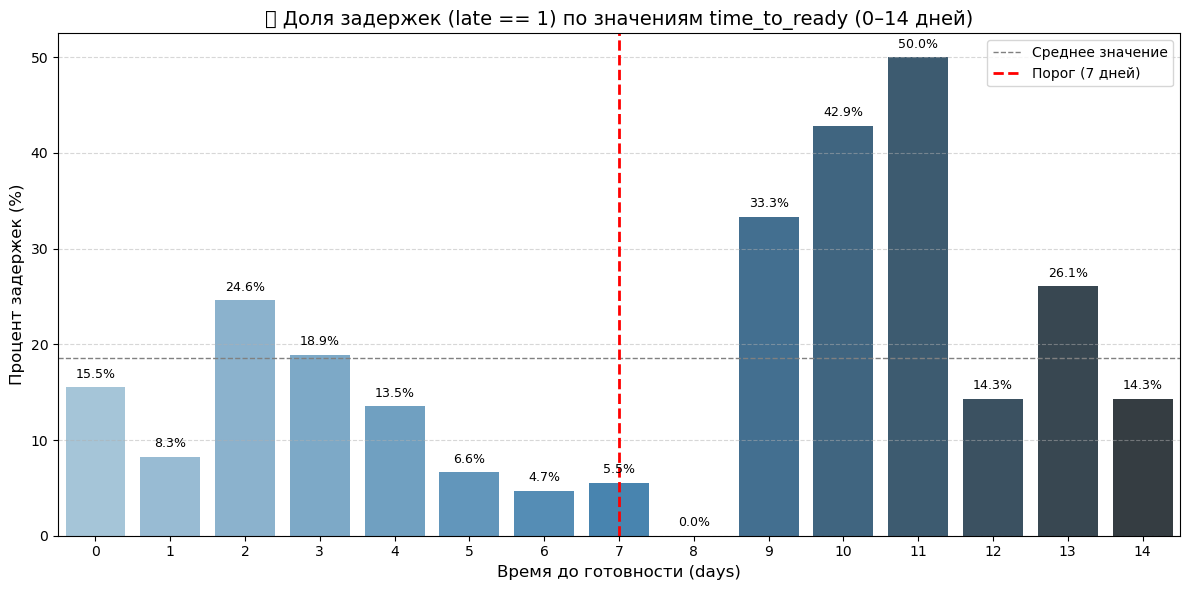

In [144]:
# Фильтруем только нужные значения time_to_ready
df_plot = df[df['client_id'] == 3]
df_plot = df_plot[df_plot['time_to_ready'].between(0, 14)]


# Считаем долю late по каждому значению time_to_ready
delay_by_ttr = (
    df_plot.groupby('time_to_ready', as_index=False)['late']
    .agg(['mean', 'count'])
    .reset_index()
)
delay_by_ttr['late_percent'] = delay_by_ttr['mean'] * 100

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_by_ttr, x='time_to_ready', y='late_percent', palette='Blues_d')

# Добавляем горизонтальные линии для наглядности
plt.axhline(y=delay_by_ttr['late_percent'].mean(), color='gray', linestyle='--', linewidth=1, label='Среднее значение')
plt.axvline(x=7, color='red', linestyle='--', linewidth=2, label='Порог (7 дней)')

# Подписываем столбцы
for i in range(len(delay_by_ttr)):
    plt.text(
        delay_by_ttr['time_to_ready'].iloc[i],
        delay_by_ttr['late_percent'].iloc[i] + 1,
        f"{delay_by_ttr['late_percent'].iloc[i]:.1f}%",
        ha='center',
        fontsize=9
    )

# Оформление
plt.title('📊 Доля задержек (late == 1) по значениям time_to_ready (0–14 дней)', fontsize=14)
plt.xlabel('Время до готовности (days)', fontsize=12)
plt.ylabel('Процент задержек (%)', fontsize=12)
plt.xticks(range(0, 15))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Попробуем в ML, чтобы модель помогла найти фичи, чтобы прогнозировать time_to_ready

In [400]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

In [416]:
# Удаляем строки с NaN в нужных колонках
df_clean = df.dropna(subset=['rc_name', 'gmv'])

# Проверяем, что всё прошло хорошо
print("✅ Пропуски удалены")
print("📊 Размер исходного датафрейма:", len(df))
print("📊 Размер очищенного датафрейма:", len(df_clean))
print("📉 Потеря данных: {:.2f}%".format(100 * (len(df) - len(df_clean)) / len(df)))

✅ Пропуски удалены
📊 Размер исходного датафрейма: 43684
📊 Размер очищенного датафрейма: 43535
📉 Потеря данных: 0.34%


In [499]:
def analyze_target(df, target_column, min_ttr_threshold=0):
    """
    Анализ выбранной целевой переменной с возможностью фильтрации по порогу.
    
    Параметры:
        df (pd.DataFrame): исходный датафрейм
        target_column (str): название целевой переменной
        min_ttr_threshold (int): минимальное значение time_to_ready для анализа (> this)
    
    Возвращает:
        model: обученная модель CatBoostRegressor
    """
    print(f"\n📊 НАЧИНАЕМ АНАЛИЗ ДЛЯ {target_column} при time_to_ready > {min_ttr_threshold}")
    
    # Фильтрация данных
    df_clean = df[df['time_to_ready'] > min_ttr_threshold].copy()
    print(f"✅ Осталось записей после фильтрации: {len(df_clean)}")
    
    # Создание дня недели
    df_clean['weekday_create'] = df_clean['create_ts'].dt.weekday
    
    # Выбор фичей
    features = [
        'Поставщик', 'catalog_id', 'gmv', 'legal_entity', 'rc_name', 'client_id',
        'weekday_create'
    ]
    
    X = df_clean[features]
    y = df_clean[target_column]
    
    # Категориальные признаки
    cat_features = ['Поставщик', 'catalog_id', 'legal_entity', 'rc_name', 'client_id']
    
    # Разделение выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print("Размер трейна:", len(X_train))
    print("Размер теста:", len(X_test))
    
    # Создание Pool
    train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
    test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)
    
    # Обучение модели -- для свича -- CatBoostRegressor -- MAE
    model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.025,
        depth=8,
        loss_function='Logloss',
        verbose=50,
        random_seed=42
    )
    
    model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=30)
    
    # Константная модель
    dummy = DummyRegressor(strategy='median')
    dummy.fit(X_train, y_train)
    y_pred_dummy = dummy.predict(X_test)
    mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
    print(f"\n🟠 MAE константной модели (медиана): {mae_dummy:.2f}")
    
    # Предсказание и оценка
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n🏁 MAE: {mae:.2f}, R²: {r2:.4f}")
    
    # Feature Importance
    print("\n📊 Важность признаков:")
    fi = model.get_feature_importance(prettified=True)
    print(fi)
    
    # SHAP значения
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    print("\n📈 SHAP: summary plot")
    shap.summary_plot(shap_values, X_test, feature_names=features)
    
    print("\n📉 SHAP: bar plot")
    shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar")
    
    return model

In [475]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
print(f"MAE константной модели: {mae_dummy:.2f}")

MAE константной модели: 1.53



📊 НАЧИНАЕМ АНАЛИЗ ДЛЯ time_to_ready при time_to_ready > -1
✅ Осталось записей после фильтрации: 43535
Размер трейна: 34828
Размер теста: 8707
0:	learn: 1.5381205	test: 1.5266650	best: 1.5266650 (0)	total: 47.1ms	remaining: 23.5s
50:	learn: 1.3479813	test: 1.3316871	best: 1.3316871 (50)	total: 1.82s	remaining: 16s
100:	learn: 1.2968190	test: 1.2839292	best: 1.2839292 (100)	total: 3.46s	remaining: 13.6s
150:	learn: 1.2819149	test: 1.2710062	best: 1.2710062 (150)	total: 5.18s	remaining: 12s
200:	learn: 1.2733471	test: 1.2634542	best: 1.2634542 (200)	total: 6.85s	remaining: 10.2s
250:	learn: 1.2673603	test: 1.2590423	best: 1.2590423 (250)	total: 8.56s	remaining: 8.49s
300:	learn: 1.2619222	test: 1.2560022	best: 1.2560022 (300)	total: 10.4s	remaining: 6.86s
350:	learn: 1.2558636	test: 1.2528818	best: 1.2528818 (350)	total: 12.5s	remaining: 5.32s
400:	learn: 1.2523234	test: 1.2516672	best: 1.2516607 (397)	total: 15.3s	remaining: 3.78s
450:	learn: 1.2490475	test: 1.2501501	best: 1.2501501 (4

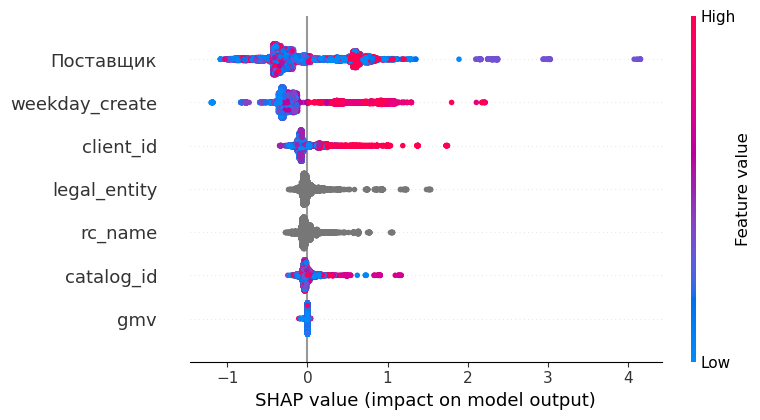


📉 SHAP: bar plot


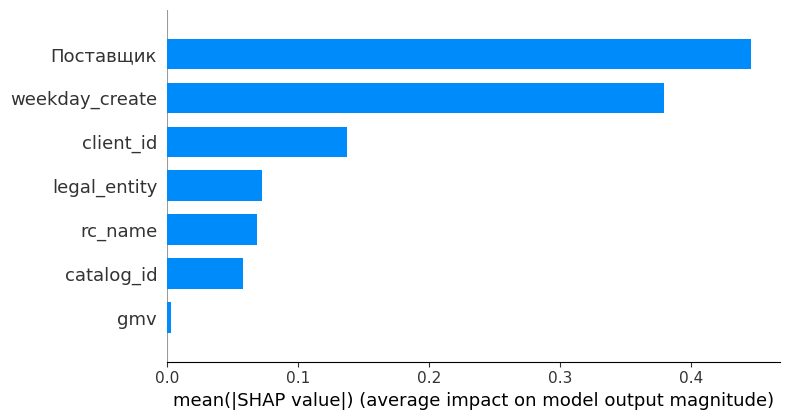

In [481]:
model_full = analyze_target(df_clean, target_column='time_to_ready', min_ttr_threshold=-1)


📊 НАЧИНАЕМ АНАЛИЗ ДЛЯ time_to_ready при time_to_ready > 2
✅ Осталось записей после фильтрации: 8590
Размер трейна: 6872
Размер теста: 1718
0:	learn: 2.8095741	test: 2.7483111	best: 2.7483111 (0)	total: 31.2ms	remaining: 15.6s
50:	learn: 2.4939256	test: 2.4929473	best: 2.4929473 (50)	total: 1.27s	remaining: 11.2s
100:	learn: 2.4062066	test: 2.4372418	best: 2.4372418 (100)	total: 2.5s	remaining: 9.89s
150:	learn: 2.3608103	test: 2.4143901	best: 2.4143901 (150)	total: 3.86s	remaining: 8.93s
200:	learn: 2.3336084	test: 2.4055722	best: 2.4055722 (200)	total: 5.16s	remaining: 7.68s
250:	learn: 2.3142234	test: 2.4012410	best: 2.4012410 (250)	total: 6.42s	remaining: 6.37s
300:	learn: 2.2876950	test: 2.3953554	best: 2.3953206 (299)	total: 7.76s	remaining: 5.13s
350:	learn: 2.2637201	test: 2.3887284	best: 2.3885852 (348)	total: 9.2s	remaining: 3.91s
400:	learn: 2.2414823	test: 2.3836909	best: 2.3836909 (400)	total: 10.6s	remaining: 2.62s
450:	learn: 2.2238684	test: 2.3776272	best: 2.3776272 (45

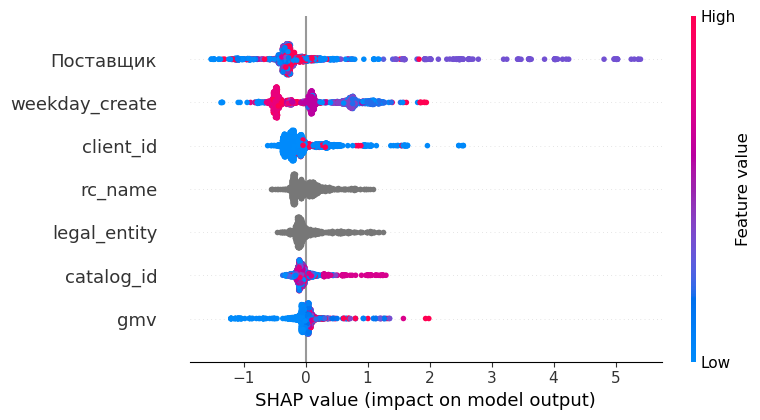


📉 SHAP: bar plot


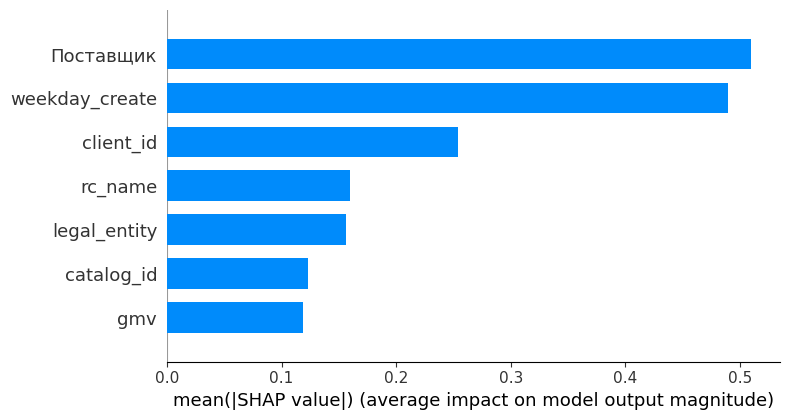

In [487]:
model_full = analyze_target(df_clean, target_column='time_to_ready', min_ttr_threshold=2)

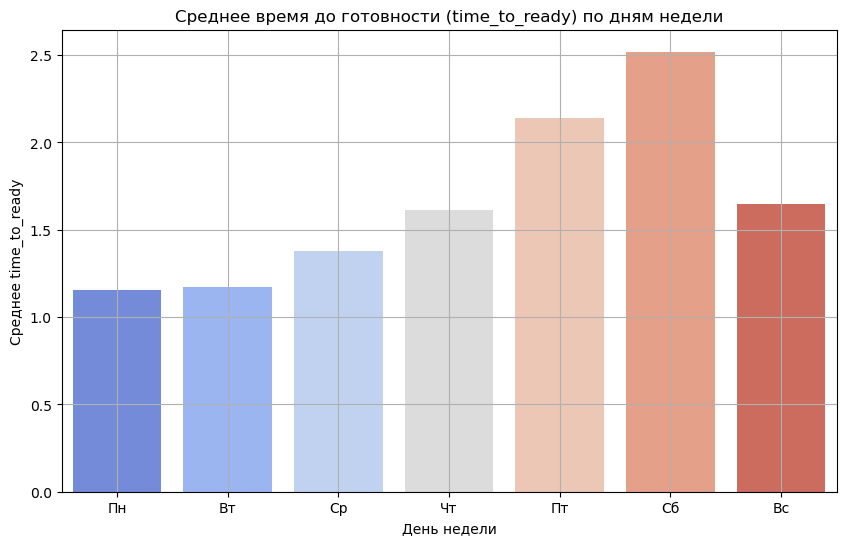

In [489]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что weekday_create есть в df_clean
df_clean['weekday_create'] = df_clean['create_ts'].dt.weekday

# Среднее time_to_ready по дням недели
ttr_by_weekday = df_clean.groupby('weekday_create')['time_to_ready'].mean().reset_index()

# Названия дней недели
days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
ttr_by_weekday['weekday_name'] = days

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_name', y='time_to_ready', data=ttr_by_weekday, palette='coolwarm')
plt.title('Среднее время до готовности (time_to_ready) по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее time_to_ready')
plt.grid(True)
plt.show()

## ГИПОТЕЗА: Медианы time_to_ready различаются хотя бы для одного дня недели. Существует хотя бы один день недели, для которого медиана time_to_ready статистически значимо отличается от других дней.
### Нулевая гипотеза: медианы time_to_ready не различаются между днями недели , то есть день недели не влияет на время до готовности. 

In [491]:
from scipy.stats import kruskal

# Группируем time_to_ready по дням недели
groups = [group['time_to_ready'].values for _, group in df_clean.groupby('weekday_create')]

# Тест Краскела-Уоллиса
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis: H={h_stat:.2f}, p-value={p_value:.4f}")

Kruskal-Wallis: H=3463.51, p-value=0.0000


## Полученный p-value = 0.0000, гораздо меньше уровня значимости 0.005 .
### Это позволяет нам отвергнуть нулевую гипотезу с очень высокой степенью уверенности.

## Таким образом, день недели оказывает статистически значимое влияние на time_to_ready.


📊 НАЧИНАЕМ АНАЛИЗ ДЛЯ late при time_to_ready > -1
✅ Осталось записей после фильтрации: 43535
Размер трейна: 34828
Размер теста: 8707
0:	learn: 0.6797469	test: 0.6795009	best: 0.6795009 (0)	total: 89.5ms	remaining: 44.6s
50:	learn: 0.4480425	test: 0.4424559	best: 0.4424559 (50)	total: 3.97s	remaining: 34.9s
100:	learn: 0.4180075	test: 0.4141897	best: 0.4141897 (100)	total: 8.63s	remaining: 34.1s
150:	learn: 0.4097882	test: 0.4081345	best: 0.4081345 (150)	total: 14.2s	remaining: 32.9s
200:	learn: 0.4043158	test: 0.4057615	best: 0.4057615 (200)	total: 20.3s	remaining: 30.1s
250:	learn: 0.4001813	test: 0.4048992	best: 0.4048992 (250)	total: 26.8s	remaining: 26.6s
300:	learn: 0.3969068	test: 0.4044081	best: 0.4043718 (296)	total: 34.1s	remaining: 22.6s
350:	learn: 0.3942740	test: 0.4037247	best: 0.4037247 (350)	total: 40.7s	remaining: 17.3s
400:	learn: 0.3910317	test: 0.4034704	best: 0.4034699 (399)	total: 47.5s	remaining: 11.7s
450:	learn: 0.3882189	test: 0.4030141	best: 0.4029994 (445)	t

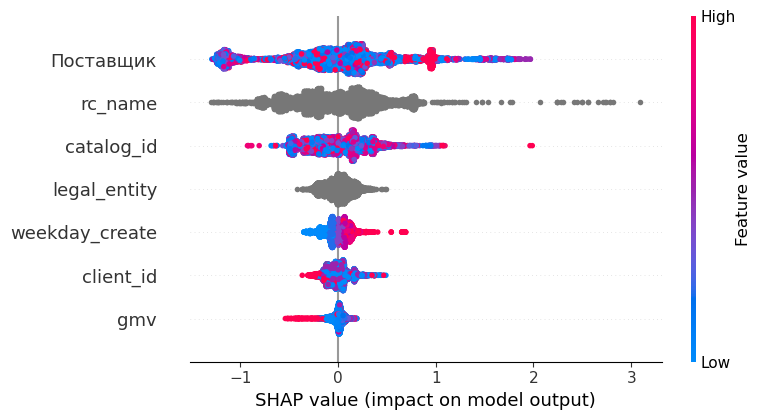


📉 SHAP: bar plot


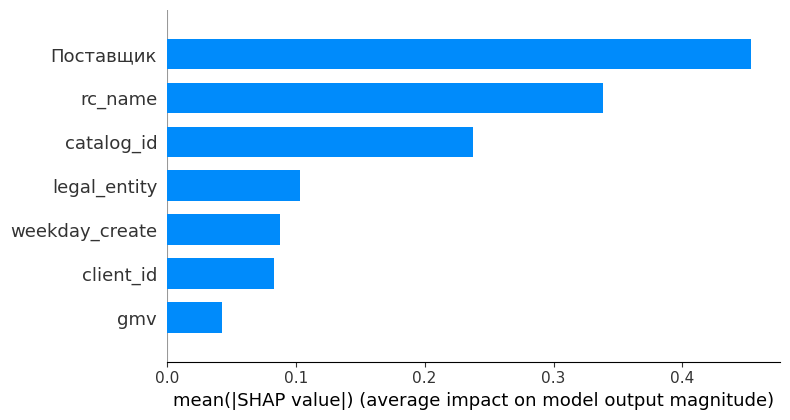

In [503]:
from catboost import CatBoostClassifier

model_full = analyze_target(df_clean, target_column='late', min_ttr_threshold=-1)

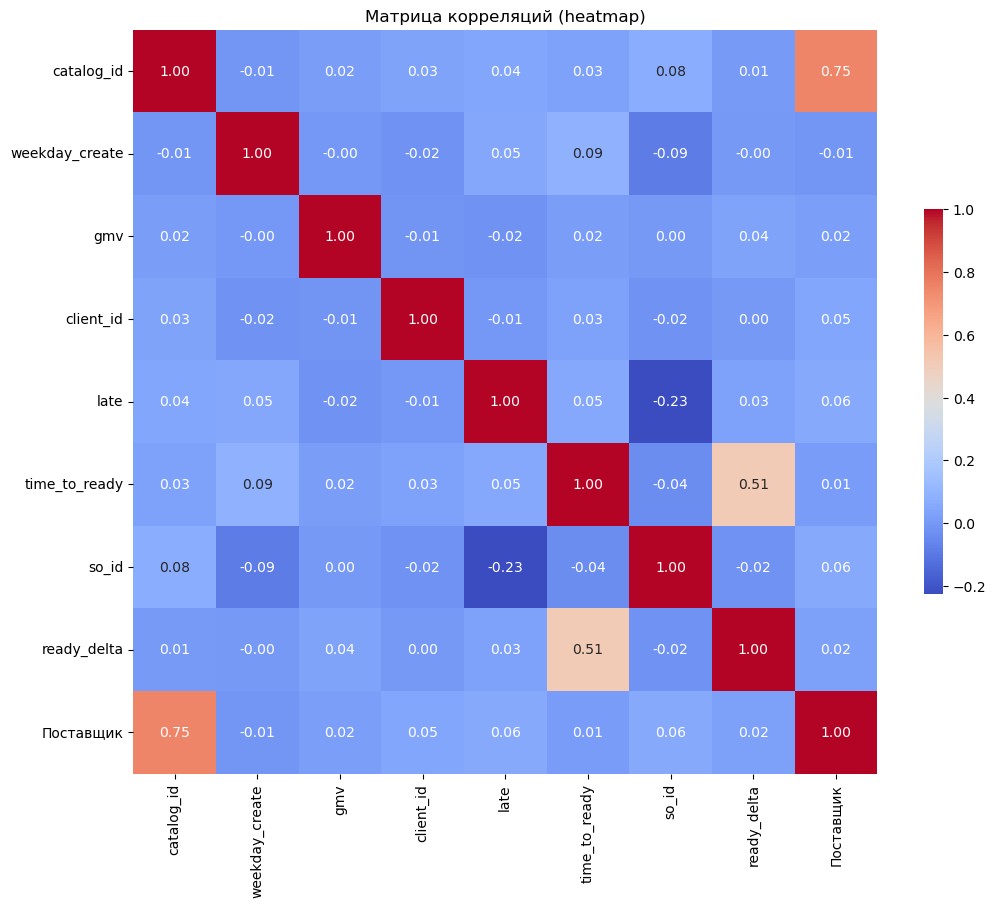

In [534]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Выберем все числовые и бинарные колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype in ['int64', 'int32']]
# Убедимся, что нет дубликатов
features = list(set(numeric_cols + binary_cols))

# 2. Формируем подвыборку с очисткой
numeric_df = df[features].copy()

# 3. Удаляем inf и -inf
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 4. Удаляем NaN
numeric_df.dropna(inplace=True)


# 5. Матрица корреляций и её отображение в виде heatmap
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title("Матрица корреляций (heatmap)")
plt.show()

# 6. Расчёт VIF (только для числовых признаков)
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# 📊 Итоговый вывод по анализу времени до готовности (`time_to_ready`)

## ✅ Общая цель
Анализ факторов, влияющих на время до готовности заказа (`time_to_ready`) и долю задержек (`late`). Построение модели для прогнозирования времени выполнения заказа и оценка значимости признаков.

---

## 🔍 Основные этапы работы

1. **Подготовка данных**
   - Загружены и объединены данные из (`otif`) + (`time_to_ready`)
   - Приведены типы, удалены пропуски, очищены выбросы.
   - Созданы новые признаки: день недели (`weekday_create`), кластеры `time_to_ready`.

2. **Исследовательский анализ (EDA)**
   - Большинство заказов обрабатывается за 1–9 дней.
   - Около 20% заказов не имеют смещения (`ready_delta == 0`).
   - Чем больше `time_to_ready`, тем выше доля задержек (`late == 1`).

3. **Статистические тесты**
   - **Chi-square test**: подтверждена зависимость между `time_to_ready` и долей задержек (p-value ≈ 0).
   - **Z-test**: найдены проблемные РЦ, клиенты и товары.
   - **Mann-Whitney U test**: определены поставщики и юрлица с высоким временем обработки.
   - **Kruskal-Wallis test**: доказано, что день недели влияет на продолжительность `time_to_ready` (p-value ≈ 0).

4. **Машинное обучение**
   - Построена модель регрессии `CatBoostRegressor` для прогнозирования `time_to_ready`.
   - Модель показала MAE = **1.25** против медианного baseline'а **1.53**.
   - R² = **0.0916**, что говорит о слабой, но положительной корреляции с целевой переменной.
   - Важнейшие фичи, на которые указала ML - модель:
     - **Поставщик** — ~40%
     - **День недели** — ~27%
     - **Клиент** и **юрлицо** — ~18%
     - **RC_name** и **gmv** — менее важны

---

## 🔍 Ключевые выводы

### 1. **Факторы, влияющие на `time_to_ready`:**

| Признак | Доля влияния | Комментарий |
|--------|--------------|-------------|
| **Поставщик** | 40% | Самый важный фактор |
| **День недели** | 27% | Среда и пятница — самые "долгие" дни |
| **Клиент** | ~11% | Некоторые клиенты часто попадают в зону риска |
| **Юрлицо** | ~7% | Несколько юрлиц требуют особого внимания |
| **GMV** | <1% | Слабое влияние на сроки |

### 2. **Выделены проблемные группы**

| Группа |
|--------|
| **РЦ** |
| **Поставщики** |
| **Клиенты** |
| **Товары** |

### 3. **Влияние дня недели**
- Суббота и пятница — самые «долгие» дни по времени до готовности.
- Тест Краскела-Уоллиса подтвердил статистически значимое влияние дня недели (p-value = 0).

---

## 📌 Итог:

Проведён полный цикл анализа: от сбора данных до построения ML-модели. Доказано влияние нескольких факторов на время до готовности и долю задержек. Выявлены проблемные поставщики, РЦ, клиенты и товары. Предложены конкретные шаги по улучшению логистических процессов и снижению числа задержек.